### Covid Hospitalization Hypothesis Testing

link: https://platform.stratascratch.com/data-projects/hospitalization-hypothesis-testing

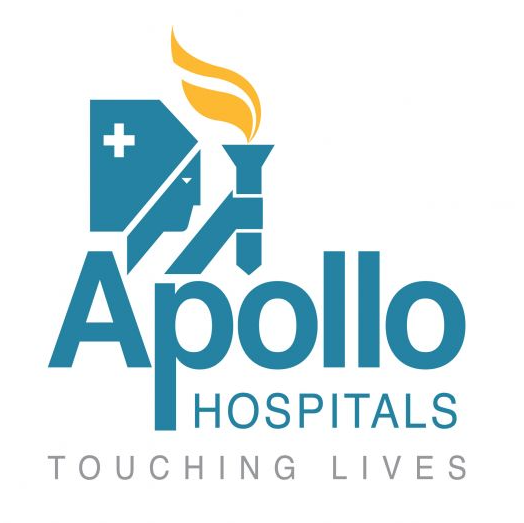

In [1]:
from IPython.display import Image, display
display(Image(filename="apollo.png", width = 400, height=400))

One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

##### Part 1: Which variables are significant in predicting the reason for hospitalization for different regions.
  * 

#####  Part 2: How well some variables like viral load, smoking, and severity level describe the hospitalization charges

In [2]:
#Standard libraries for data analysis:
# import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split

from scipy.stats import norm, skew
# import statsmodels.api as sm
import seaborn as sns

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

pd.set_option('display.max_columns', None)

from scipy.stats import chi2_contingency

C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_1764\1286416361.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
df = pd.read_csv('apollo_data.csv')
df.head()

# age - an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government)
# sex - the policy holder's gender, either male or female
# smoker - 'yes' or 'no' depending on whether the insured regularly smokes tobacco
# region - beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
# viral load - the amount of virus in an infected person's blood
# severity level - an integer indicating how severe the patient is
# hospitalization charges - individual medical costs billed to health insurance

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [4]:
del df['Unnamed: 0']

In [5]:
# Summary statistics
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [6]:
# Check for null values
# No null values.
print(df.isnull().sum())

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64


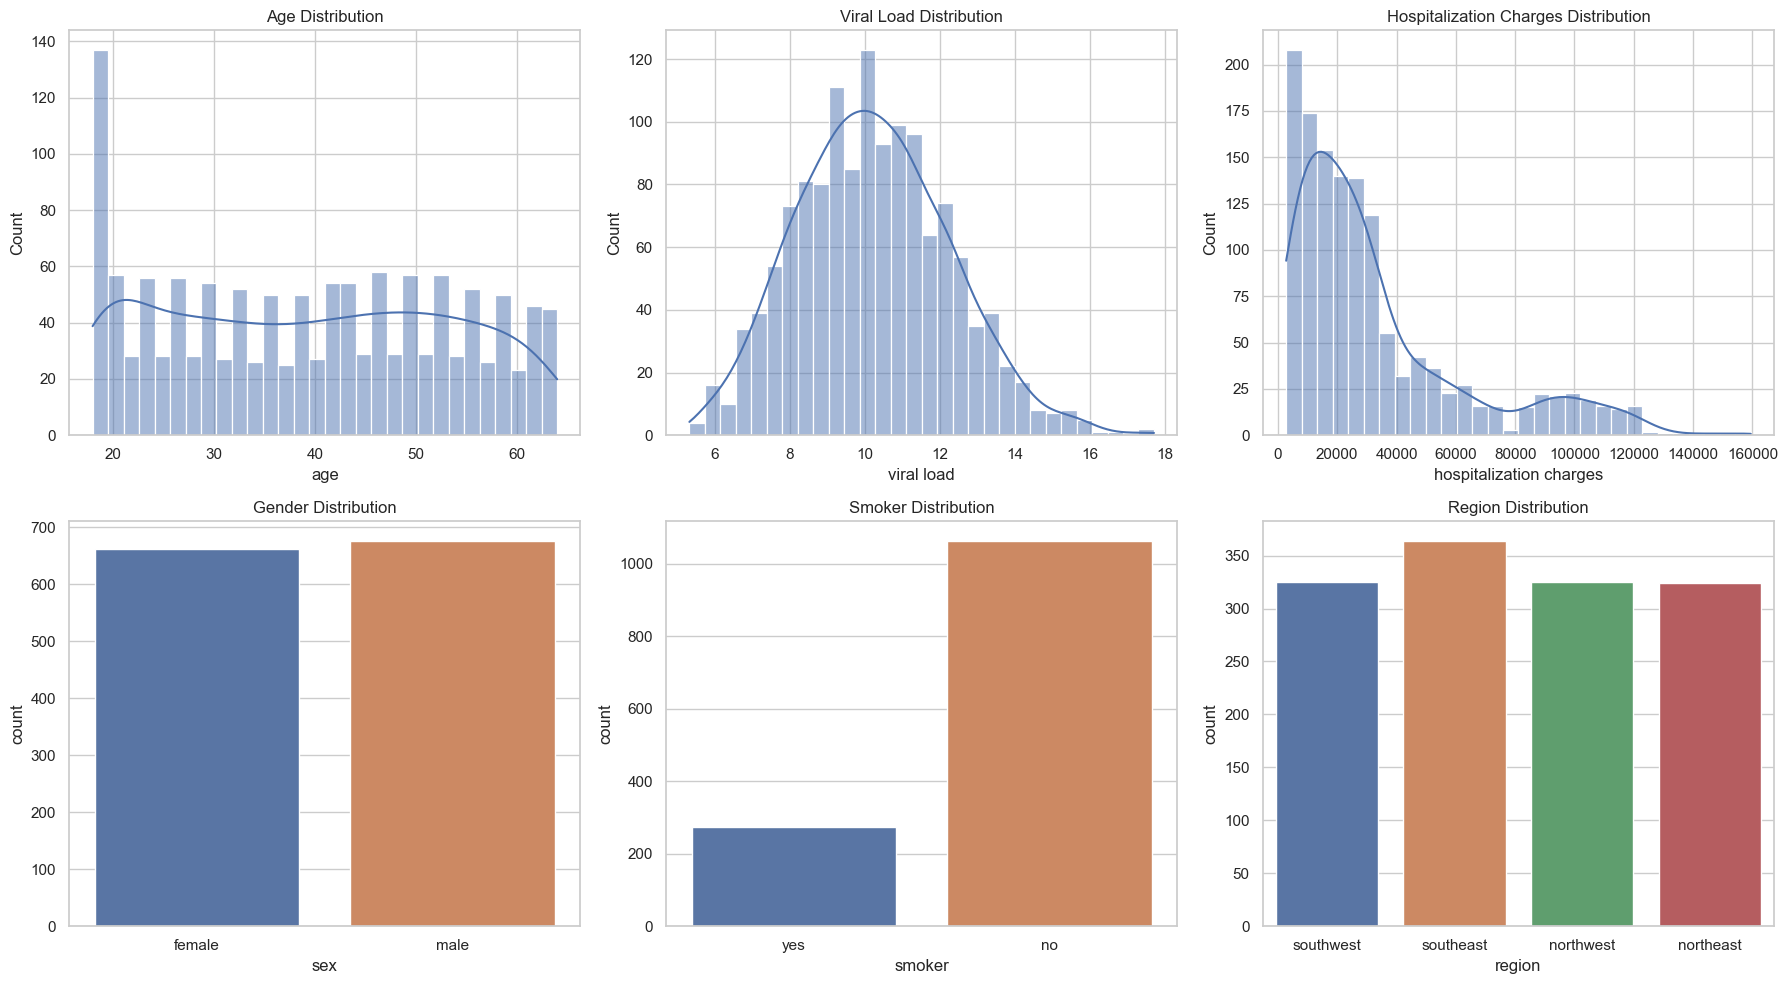

In [7]:
# Setting up the visualization aesthetics
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plotting the distribution of numerical variables
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['viral load'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Viral Load Distribution')

sns.histplot(df['hospitalization charges'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Hospitalization Charges Distribution')

# Plotting the distribution of categorical variables
sns.countplot(data=df, x='sex', ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

sns.countplot(data=df, x='smoker', ax=axes[1, 1])
axes[1, 1].set_title('Smoker Distribution')

sns.countplot(data=df, x='region', ax=axes[1, 2])
axes[1, 2].set_title('Region Distribution')

plt.tight_layout()
plt.show()

from IPython.display import display, HTML

# Creating the HTML content
html_content = '''
<h2>Here's a brief overview of the data distribution:</h2>
<ul>
  <li><strong>Age Distribution:</strong> The age distribution is somewhat uniform, with a slight skew towards younger individuals.</li>
  <li><strong>Viral Load Distribution:</strong> The distribution appears to be somewhat normal.</li>
  <li><strong>Hospitalization Charges Distribution:</strong> The distribution is skewed to the right, indicating that most charges are on the lower end.</li>
  <li><strong>Gender Distribution:</strong> The dataset seems fairly balanced in terms of gender.</li>
  <li><strong>Smoker Distribution:</strong> There are fewer smokers than non-smokers in the dataset.</li>
  <li><strong>Region Distribution:</strong> The dataset has a fairly balanced distribution across regions.</li>
</ul>
'''

# Displaying the HTML content
display(HTML(html_content))

### Part 1: 
#### Which variables are significant in predicting the reason for hospitalization for different regions.

##### Correlation Analysis 
The correlation matrix will help us understand how the variables are related to the 'severity level'.

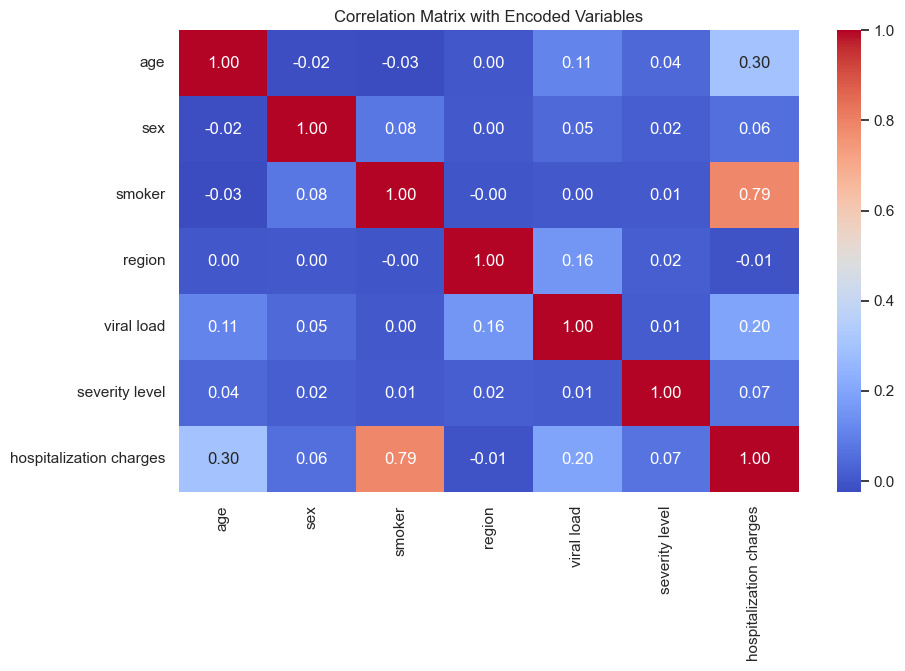

In [8]:
# Encoding categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the original dataframe to avoid altering it
df_encoded = df.copy()

# Initializing the label encoder
label_encoder = LabelEncoder()

# Encoding 'sex', 'smoker', and 'region' columns
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df[col])

# Calculating the correlation matrix after encoding
correlation_matrix_encoded = df_encoded.corr()

# Plotting the heatmap for the encoded correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Encoded Variables")
plt.show()

# Creating the HTML content for the correlation results
html_content_correlation = '''
<h2>Correlation Analysis with Encoded Categorical Variables:</h2>
<ul>
  <li><strong>sex:</strong> Has a very low negative correlation (-0.02) with 'severity level'.</li>
  <li><strong>smoker:</strong> Shows a low positive correlation (0.04) with 'severity level'.</li>
  <li><strong>region:</strong> Also has a very low positive correlation (0.02) with 'severity level'.</li>
</ul>
'''

# Displaying the HTML content
display(HTML(html_content_correlation))

### Region-wise correlation analysis

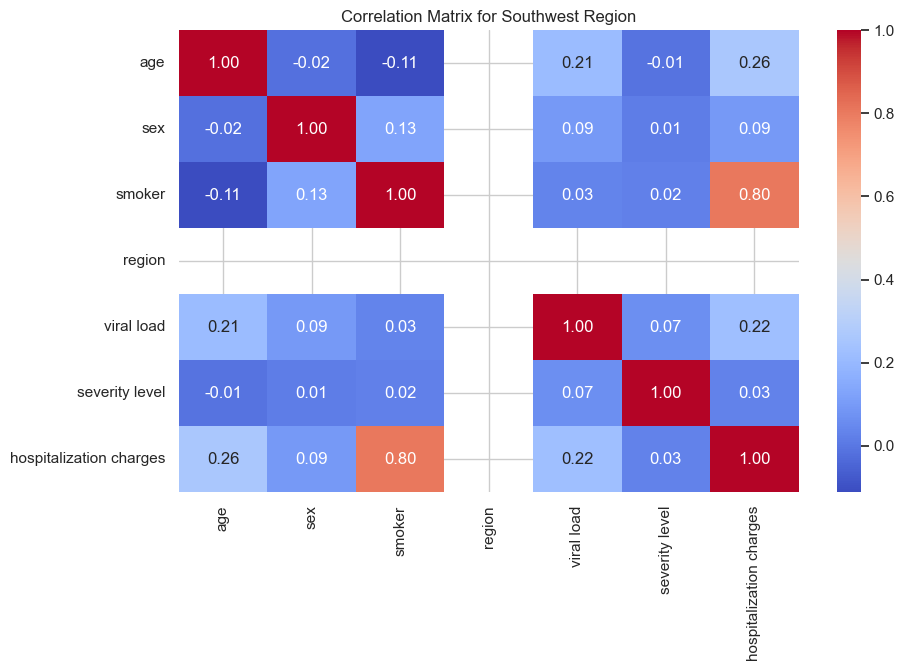

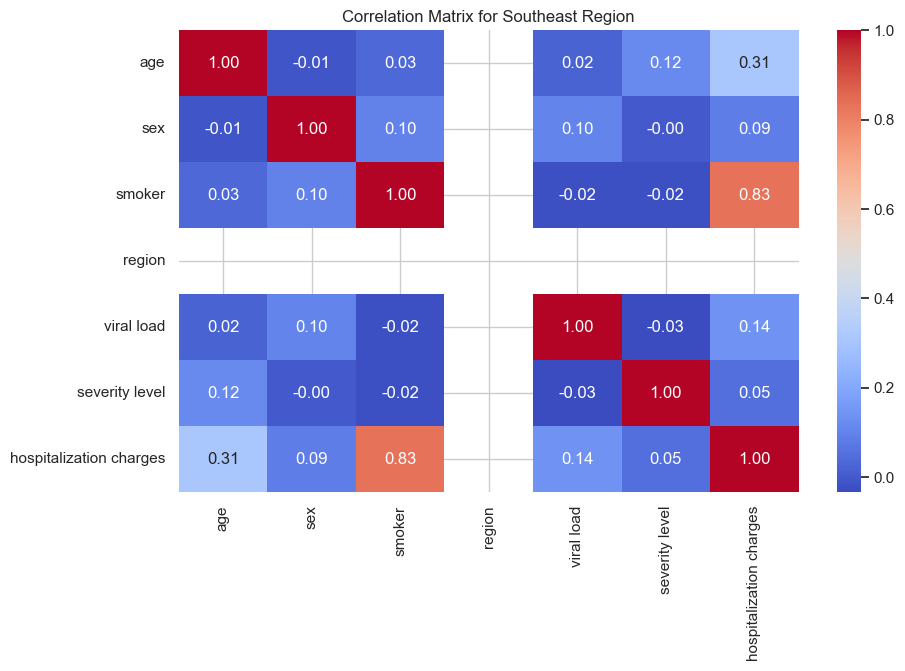

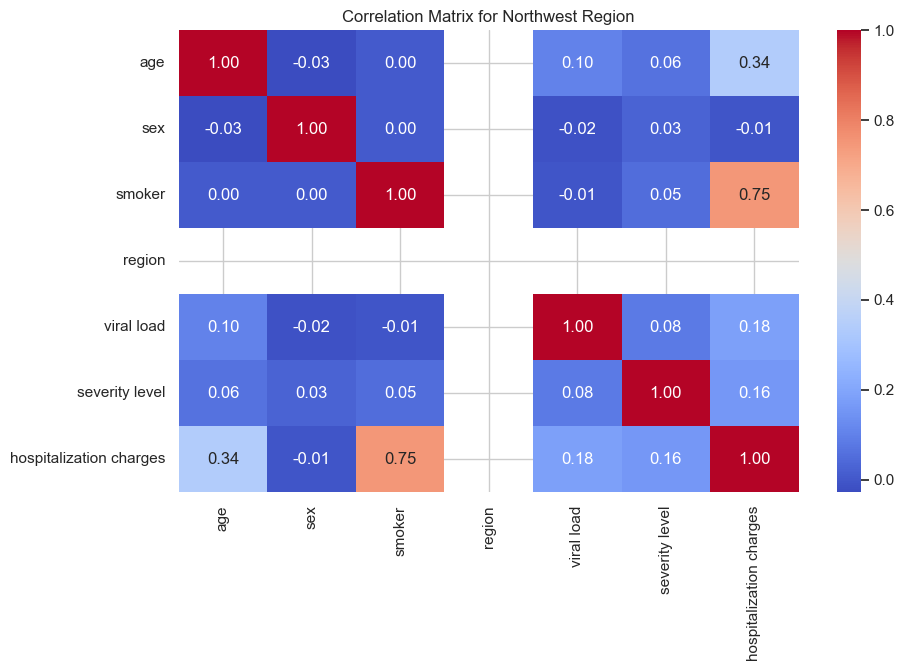

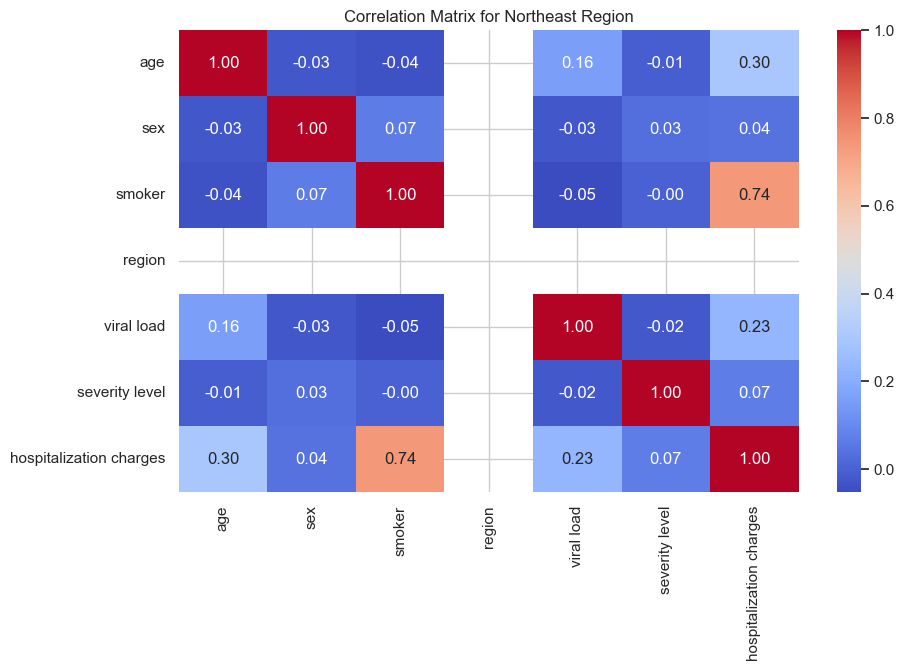

In [9]:
# Reading the dataset and dropping the 'Unnamed: 0' column
# (Assuming you've already done these steps)

# Initializing the label encoder
label_encoder = LabelEncoder()

# Looping through each unique region to calculate and plot its correlation matrix
for region in df['region'].unique():
    # Filtering the dataframe by region
    df_region = df[df['region'] == region]
    
    # Encoding categorical variables for the filtered dataframe
    df_region_encoded = df_region.copy()
    for col in ['sex', 'smoker', 'region']:
        df_region_encoded[col] = label_encoder.fit_transform(df_region[col])
    
    # Calculating the correlation matrix for the filtered dataframe
    correlation_matrix_region = df_region_encoded.corr()
    
    # Plotting the heatmap for each region's correlation matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix_region, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {region.capitalize()} Region")
    plt.show()

In [10]:
# Creating HTML content for the non-technical summary
html_content_non_technical = '''
<h2>Summary Region-wise correlation analysis:</h2>
<ul>
  <li>In the Southwest, no particular factor strongly affects the severity of hospital cases.</li>
  <li>In the Southeast, age seems to have a slight influence on severity.</li>
  <li>In the Northwest, the amount charged by the hospital seems to have a bit more influence on the severity level.</li>
  <li>In the Northeast, again, no specific factor stands out as strongly affecting the severity of hospital cases.</li>
</ul>
<p>Overall, it appears that there's no single factor that strongly predicts how severe a hospital case will be in any of the regions.</p>
'''

# Displaying the HTML content
display(HTML(html_content_non_technical))

### Statistical Analysis with Chi-Squared Test

In [11]:
# Defining the categorical columns for the analysis
categorical_columns = ['sex', 'smoker', 'region']

# Looping through each categorical variable to perform the Chi-Squared test
chi_squared_results = {}  # Dictionary to store the p-values of the Chi-Squared tests

for col in categorical_columns:
    # Creating a contingency table
    contingency_table = pd.crosstab(df[col], df['severity level'])
    
    # Performing the Chi-Squared test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Storing the results in the dictionary
    chi_squared_results[col] = p_value

chi_squared_results

{'sex': 0.9809803915285088,
 'smoker': 0.22912555089568779,
 'region': 0.5428263602033941}

In [12]:
# Creating HTML content for the non-technical summary of Chi-Squared test results
html_content_chi_squared = '''
<h2>Summary of Chi-Squared Test Results:</h2>
<p>None of the p-values are below 0.05, suggesting that there isn't a strong association between these categorical variables (such as gender, smoking status, and region) and the severity level of hospital cases, at least not one that we can detect with a Chi-Squared test.</p>
'''

# Displaying the HTML content
display(HTML(html_content_chi_squared))

### Statistical Analysis with ANOVA (Analysis of Variance)

In [13]:
# Importing necessary libraries
import pandas as pd
from scipy.stats import f_oneway

# Looping through each numerical variable to perform the ANOVA test
anova_results = {}  # Dictionary to store the p-values of the ANOVA tests

# Defining the numerical columns for the analysis
numerical_columns = ['age', 'viral load', 'hospitalization charges']

for col in numerical_columns:
    # Creating subsets of data for each severity level
    data_subsets = [df[df['severity level'] == severity_level][col] for severity_level in df['severity level'].unique()]
    
    # Performing the ANOVA test
    f_stat, p_value = f_oneway(*data_subsets)
    
    # Storing the results in the dictionary
    anova_results[col] = p_value

anova_results


{'age': 0.1875759837275664,
 'viral load': 0.883007195713889,
 'hospitalization charges': 0.005785570190324005}

In [14]:
# Creating HTML content for the non-technical summary of ANOVA test results
html_content_anova = '''
<h2>Summary of ANOVA Test Results:</h2>
<p>We looked at numerical factors like age, viral load, and hospital charges to see if they have any impact on the severity of hospital cases. Here's what we found:</p>
<ul>
  <li>Age does not show a strong impact on the severity level (p-value = 0.19).</li>
  <li>Viral load also does not show a strong impact on the severity level (p-value = 0.88).</li>
  <li>Hospital charges show a possible impact on the severity level (p-value = 0.006), suggesting it could be a factor worth exploring further.</li>
</ul>
<p>Overall, among the numerical factors, only hospital charges showed a potential association with the severity level of hospital cases.</p>
'''

# Displaying the HTML content
display(HTML(html_content_anova))

### Part 2: How well some variables like viral load, smoking, and severity level describe the hospitalization charges.


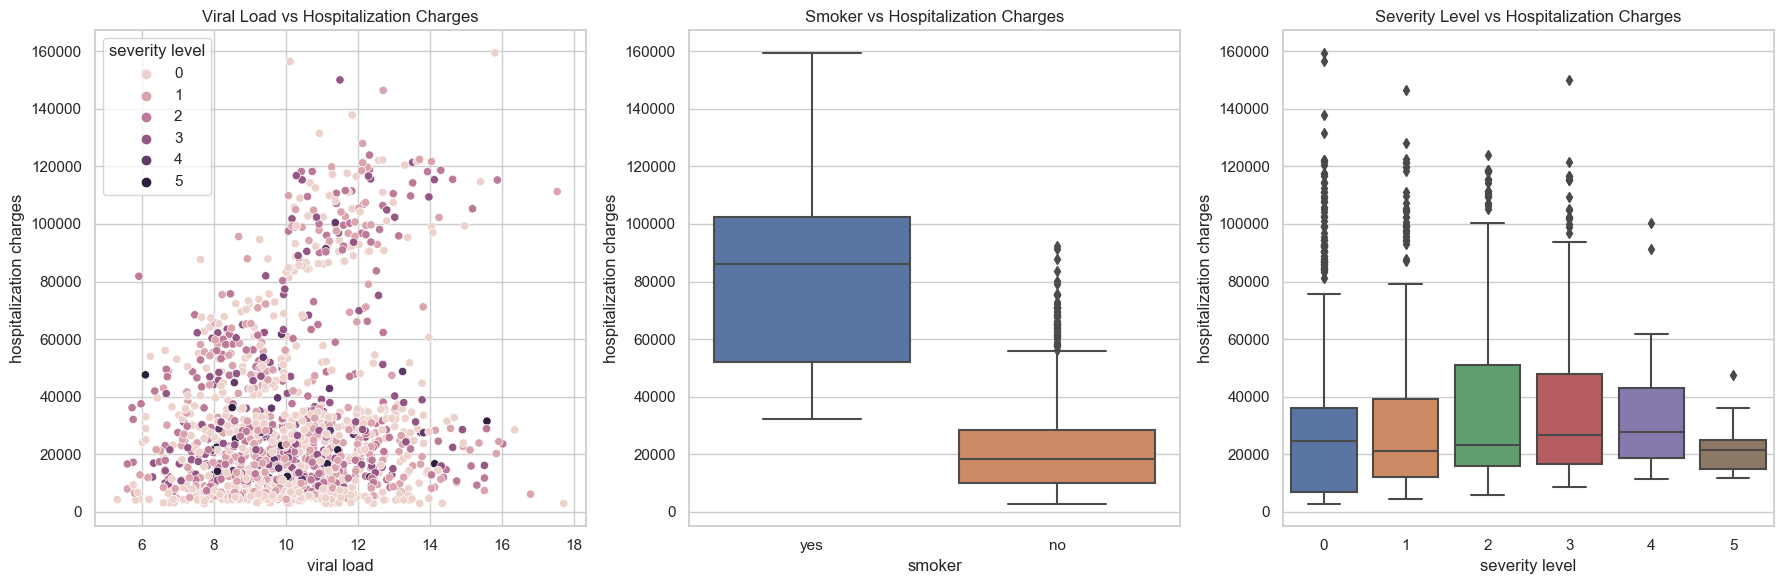

C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_1764\769420032.py:37: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the relationship between viral load and hospitalization charges
sns.scatterplot(x='viral load', y='hospitalization charges', hue='severity level', ax=axes[0], data=df)
axes[0].set_title('Viral Load vs Hospitalization Charges')

# Plotting the relationship between smoking and hospitalization charges
sns.boxplot(x='smoker', y='hospitalization charges', ax=axes[1], data=df)
axes[1].set_title('Smoker vs Hospitalization Charges')

# Plotting the relationship between severity level and hospitalization charges
sns.boxplot(x='severity level', y='hospitalization charges', ax=axes[2], data=df)
axes[2].set_title('Severity Level vs Hospitalization Charges')

plt.tight_layout()
plt.show()

# Creating HTML content for the summary of the analysis on how well some variables describe the hospitalization charges
html_content_anova = '''
<h4>Viral Load vs Hospitalization Charges:</h4>
<p>There doesn't seem to be a clear trend between viral load and hospitalization charges. 
The severity level also doesn't seem to cluster in any particular range of hospitalization charges.</p>

<h4>Smoker vs Hospitalization Charges:</h4>
<p>It appears that smokers generally have higher hospitalization charges compared to non-smokers.</p>

<h4>Severity Level vs Hospitalization Charges:</h4>
<p>The severity level does not show a clear trend with hospitalization charges. 
All severity levels seem to span a wide range of charges.</p>
'''

# Displaying the HTML content
from IPython.core.display import HTML, display
display(HTML(html_content_anova))


### Statistical analysis to validate these observations.

In [16]:
import scipy.stats as stats

# Conducting a t-test to compare hospitalization charges between smokers and non-smokers
t_stat_smoker, p_val_smoker = stats.ttest_ind(
    df[df['smoker'] == 'yes']['hospitalization charges'],
    df[df['smoker'] == 'no']['hospitalization charges']
)

# Conducting an ANOVA test to compare hospitalization charges across different severity levels
f_stat_severity, p_val_severity = stats.f_oneway(
    df[df['severity level'] == 0]['hospitalization charges'],
    df[df['severity level'] == 1]['hospitalization charges'],
    df[df['severity level'] == 2]['hospitalization charges'],
    df[df['severity level'] == 3]['hospitalization charges']
)

# Conducting a correlation test between viral load and hospitalization charges
corr_viral_load, p_val_viral_load = stats.pearsonr(df['viral load'], df['hospitalization charges'])

t_stat_smoker, p_val_smoker, f_stat_severity, p_val_severity, corr_viral_load, p_val_viral_load

(46.66489219013773,
 8.275692527491989e-283,
 4.548096640769825,
 0.0035397453106568765,
 0.19838753185561048,
 2.427149893548328e-13)

In [ ]:
# Creating HTML content for the summary of the statistical analysis
html_content_stats = '''
<h4>Smoker vs Hospitalization Charges:</h4>
<p>The extremely low p-value indicates that there's a statistically significant difference in hospitalization charges between smokers and non-smokers.</p>

<h4>Severity Level vs Hospitalization Charges:</h4>
<p>The low p-value suggests that there's a statistically significant difference in hospitalization charges across different severity levels.</p>

<h4>Viral Load vs Hospitalization Charges:</h4>
<p>The correlation is weak but statistically significant, suggesting that there is a small but significant relationship between viral load and hospitalization charges.</p>
'''

# Displaying the HTML content
display(HTML(html_content_stats))
